    # Automatic Jupyter Notebook for OpenML dataset 55: hepatitis

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 55
data = oml.datasets.get_dataset(did)
X, y, features = getData(data)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

,flow,score
0,weka.Bagging_NaiveBayes(2),0.888465
1,weka.Bagging_NaiveBayes(1),0.887703
2,weka.NaiveBayes(13),0.886179
3,weka.kf.AttributeSelection-BestFirst-CfsSubset...,0.885417
4,weka.kf.ReplaceMissingValues-PKIDiscretize-Nai...,0.884654
5,weka.BayesNet_K2(6),0.882368
6,weka.BayesNet_K2(6),0.882368
7,weka.BayesNet_K2(6),0.882368
8,weka.BayesNet_K2(6),0.882368
9,weka.BayesNet_K2(6),0.882368


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


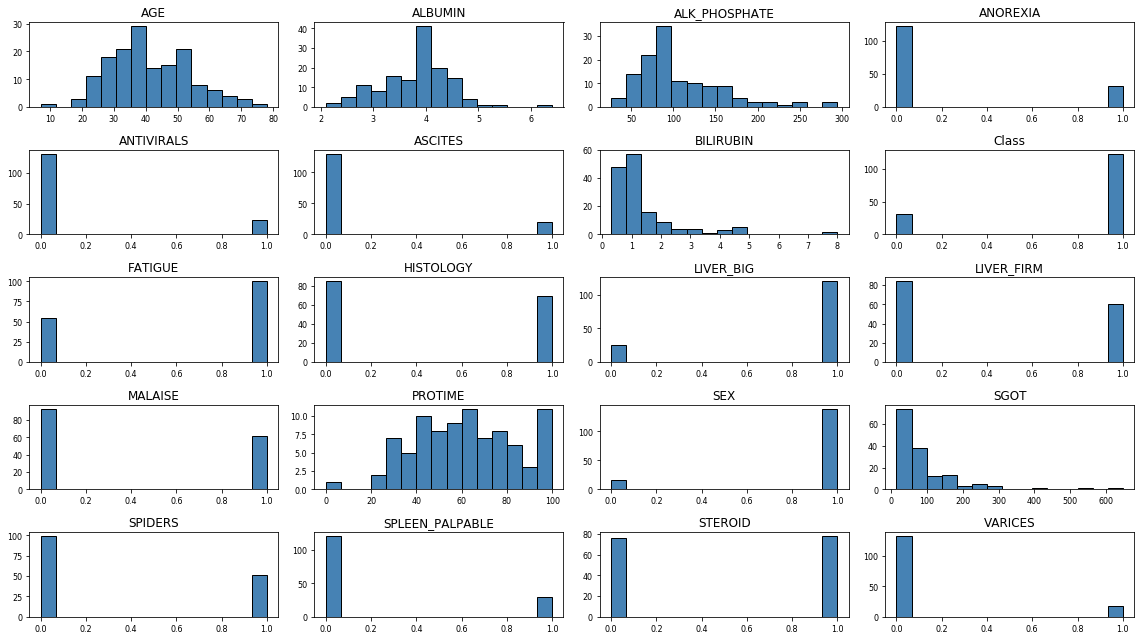

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,outlier
135,25,1,1,0,1,0,0,0,1,1,1,1,1,1.3,181,181,4.5,57,1,-0.0621519
125,34,0,1,0,1,1,1,0,1,0,1,0,0,0.7,70,24,4.1,100,1,-0.058167
37,20,0,0,0,1,1,1,0,1,1,1,0,0,2.3,150,68,3.9,nan,0,-0.0532944
90,50,0,0,0,1,0,0,0,1,1,1,0,0,0.9,230,117,3.4,41,1,-0.0515408
150,46,1,1,0,1,1,1,1,0,0,1,1,1,7.6,nan,242,3.3,50,1,-0.05125
140,36,1,0,0,1,1,1,0,1,0,1,0,1,1.7,295,60,2.7,nan,1,-0.0501827
147,70,1,0,0,1,1,1,nan,nan,nan,nan,nan,nan,1.7,109,528,2.8,35,1,-0.0494219
62,32,1,1,0,1,1,1,1,0,0,1,0,1,3.5,215,54,3.4,29,0,-0.0483795
103,51,1,0,0,1,1,1,1,1,1,1,0,1,4.6,215,269,3.9,51,1,-0.047432
153,53,0,0,0,1,0,0,1,0,1,1,0,1,1.5,81,19,4.1,48,1,-0.0421983


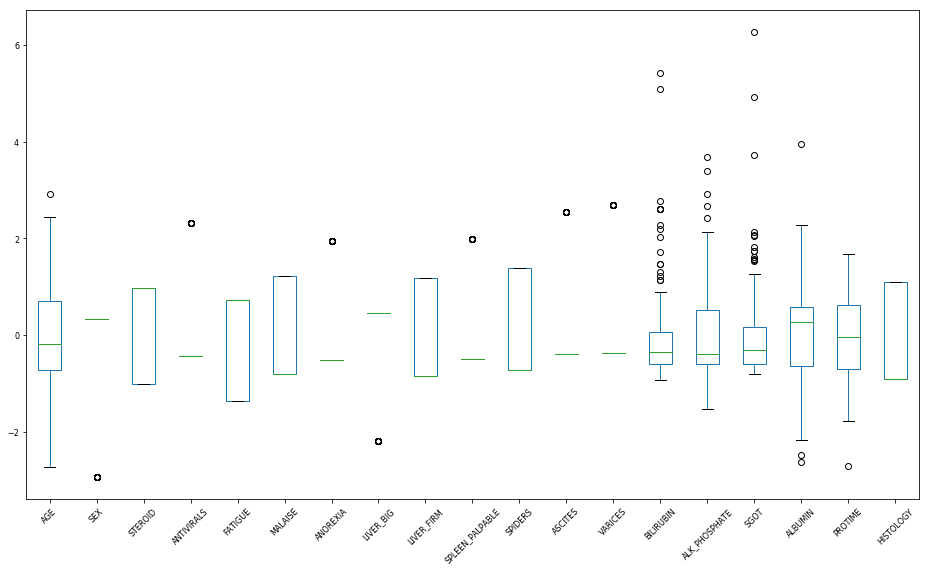

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

    did                     name  similarity                            url
0   336                    SPECT       0.812   https://www.openml.org/d/336
1    52                   trains       0.752    https://www.openml.org/d/52
2   172  shuttle-landing-control       0.735   https://www.openml.org/d/172
3    13            breast-cancer       0.726    https://www.openml.org/d/13
4   470                    profb       0.696   https://www.openml.org/d/470
5   186            braziltourism       0.683   https://www.openml.org/d/186
6  1003            primary-tumor       0.682  https://www.openml.org/d/1003
7   334         monks-problems-2       0.659   https://www.openml.org/d/334
8   999                audiology       0.655   https://www.openml.org/d/999
9  1000              hypothyroid       0.655  https://www.openml.org/d/1000


Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

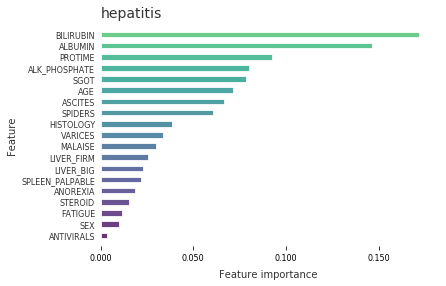

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

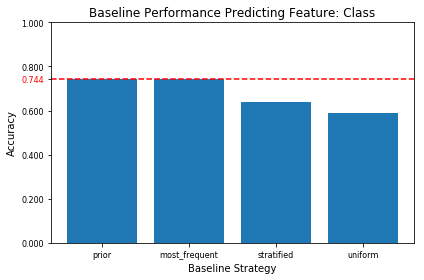

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [9]:
removeOutliers = False 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Run already exists in OpenML, WIP
Run already exists in OpenML, WIP


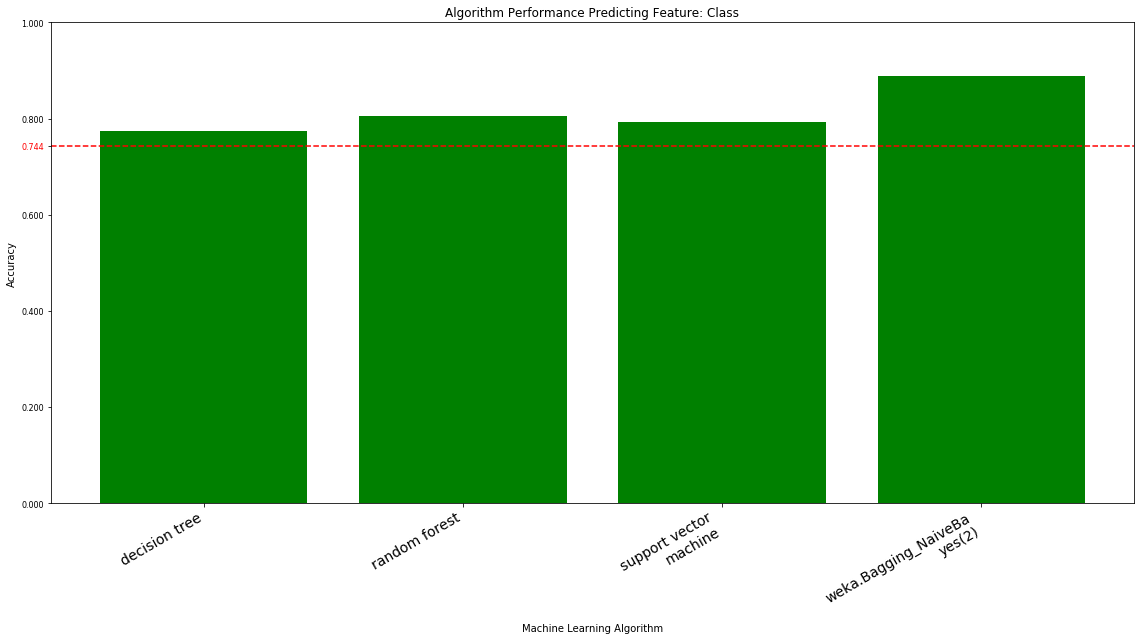

In [10]:
from scripts.machineLearningAlgorithms import *
settings = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, settings.strats, maxBaseline, problemType) 

Run already exists in OpenML, WIP


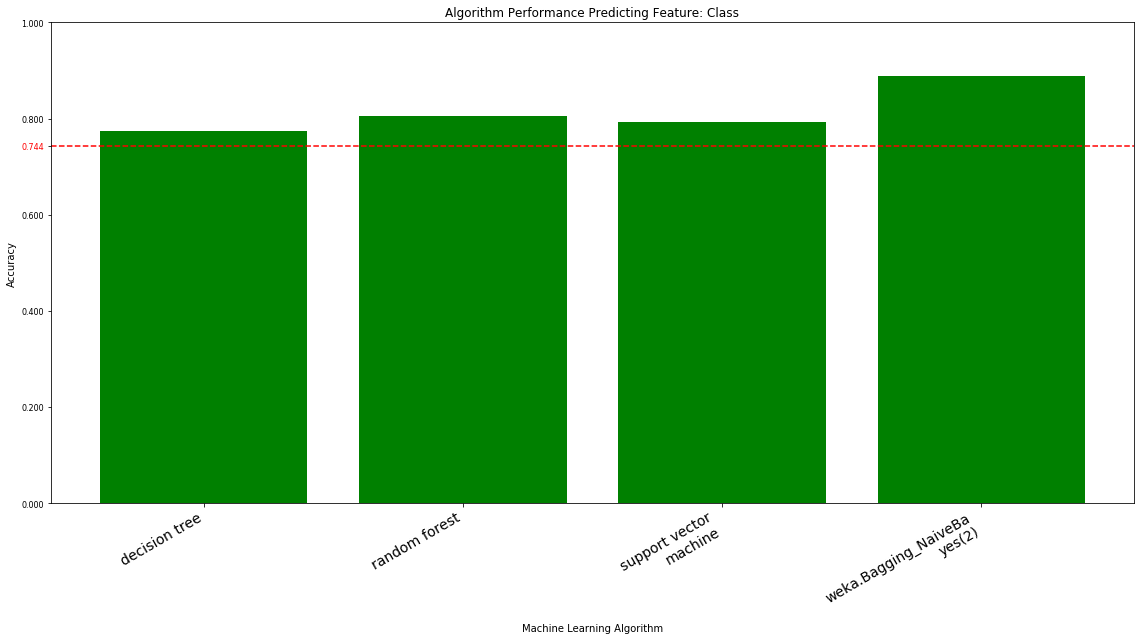

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Create a custom algorithm by setting classifier and name
#---------------------------------------------------
clf =  QuadraticDiscriminantAnalysis()
name = "CustomAlgorithmQuadraticDiscriminantAnalysis"
#---------------------------------------------------
runMLAlgorithm(estimator=clf, name=name, settings=settings)
plot_alg(data, settings.strats, maxBaseline, problemType) 

In [12]:
%matplotlib nbagg
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, settings.strats, maxBaseline) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>